In [129]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.impute import SimpleImputer


In [130]:
df = pd.read_csv('cars.csv')

In [131]:
df.sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
97385,Chevrolet,Suburban Z71,2022,16426.0,5.3L V8 16V GDI OHV,Automatic,Four-wheel Drive,Gasoline,NaN,Satin Steel Metallic,Jet Black,0.0,1.0,0.0,Hertz Car Sales Warminster,NaN,5.0,3.0,613.0,68178.0
26680,BMW,228 Gran Coupe 228i sDrive Gran Coupe,2021,18924.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Front-wheel Drive,Gasoline,24-33,Alpine White,Oyster / Black,0.0,0.0,1.0,Tamiami Hyundai,4.7,5.0,3.0,NaN,34990.0
74242,Buick,Encore Sport Touring,2017,57059.0,1.4L I4 16V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,24-30,Graphite Gray Metallic,Ebony,0.0,0.0,1.0,McDaniel GM Superstore,4.4,4.6,213.0,400.0,18900.0


### Now as per the analysis from last trial, we need to seprate the data into differnet manufacturers

In [132]:
df['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [133]:
df[df['manufacturer'] == 'Acura'].sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
422,Acura,ILX Premium Package,2019,14568.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Modern Steel Metallic,Ebony,0.0,1.0,1.0,Mercedes-Benz Of Bend,4.1,4.7,26.0,464.0,26896.0
2926,Acura,RDX Base,2020,38957.0,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,All-wheel Drive,Gasoline,21-27,Platinum White Pearl,Ebony,0.0,1.0,1.0,Piazza Acura of Ardmore,4.7,4.6,97.0,418.0,32999.0
7221,Acura,TLX FWD,2020,34930.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,23-33,Platinum White Pearl,Ebony,0.0,1.0,1.0,Lovering Volvo Cars Nashua,4.9,4.9,32.0,101.0,25989.0


In [134]:
man_lst = df['manufacturer'].unique()

for m in man_lst:
    df_m= df[df['manufacturer'] == m]

    globals()[f'df_{m}'] = df_m

    print(f'df for manufacturer {m} saved as df_{m}')


df for manufacturer Acura saved as df_Acura
df for manufacturer Audi saved as df_Audi
df for manufacturer BMW saved as df_BMW
df for manufacturer Buick saved as df_Buick
df for manufacturer Cadillac saved as df_Cadillac
df for manufacturer Chevrolet saved as df_Chevrolet
df for manufacturer Chrysler saved as df_Chrysler
df for manufacturer Dodge saved as df_Dodge
df for manufacturer Ford saved as df_Ford
df for manufacturer GMC saved as df_GMC
df for manufacturer Honda saved as df_Honda
df for manufacturer Hyundai saved as df_Hyundai
df for manufacturer INFINITI saved as df_INFINITI
df for manufacturer Jaguar saved as df_Jaguar
df for manufacturer Jeep saved as df_Jeep
df for manufacturer Kia saved as df_Kia
df for manufacturer Land Rover saved as df_Land Rover
df for manufacturer Lexus saved as df_Lexus
df for manufacturer Lincoln saved as df_Lincoln
df for manufacturer Mazda saved as df_Mazda
df for manufacturer Mercedes-Benz saved as df_Mercedes-Benz
df for manufacturer Mitsubishi s

In [135]:
df_Ford.shape

(79526, 20)

### Let's start with ford as it is having the largest numbers of record in the whole dataset, we were able to get the a seprate dataframe for, now we can anlyse the `missing values`, `outliers`, observe and handle them properly.

In [136]:
df = df_Ford

In [137]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature", "Unique Values", "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Unique Values,Missing Values,Missing Percentage
0,manufacturer,1,0,0.00
1,model,1156,0,0.00
2,year,92,0,0.00
3,mileage,58525,38,0.05
4,engine,1155,200,0.25
5,transmission,386,720,0.91
6,drivetrain,10,2341,2.94
7,fuel_type,13,3603,4.53
8,mpg,341,21568,27.12
9,exterior_color,1163,1482,1.86


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79526 entries, 190280 to 269805
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   manufacturer         79526 non-null  object 
 1   model                79526 non-null  object 
 2   year                 79526 non-null  int64  
 3   mileage              79488 non-null  float64
 4   engine               79326 non-null  object 
 5   transmission         78806 non-null  object 
 6   drivetrain           77185 non-null  object 
 7   fuel_type            75923 non-null  object 
 8   mpg                  57958 non-null  object 
 9   exterior_color       78044 non-null  object 
 10  interior_color       70333 non-null  object 
 11  accidents_or_damage  77381 non-null  float64
 12  one_owner            76313 non-null  float64
 13  personal_use_only    77237 non-null  float64
 14  seller_name          78745 non-null  object 
 15  seller_rating        55279 non-null

In [139]:
## To analyse some underlying patterns from the string features, we'll create word cloud, what are the trends in the dataset

In [140]:
# Combine all the single words in 'product_name' column into one string
text_model = ' '.join(df['model'].dropna()) 
# text_year = ' '.join(df['year'].dropna())
text_engine = ' '.join(df['engine'].dropna())
text_transmission = ' '.join(df['transmission'].dropna())
text_mpg = ' '.join(df['mpg'].dropna())
text_exterior_color = ' '.join(df['exterior_color'].dropna())
text_interior_color = ' '.join(df['interior_color'].dropna())
text_seller_name = ' '.join(df['seller_name'].dropna())
# text_price = ' '.join(df['price'].dropna())

# Model

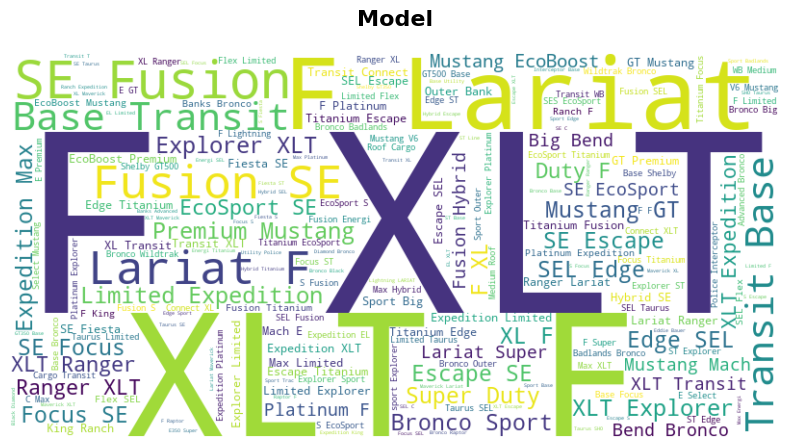

In [141]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_model)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Model", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

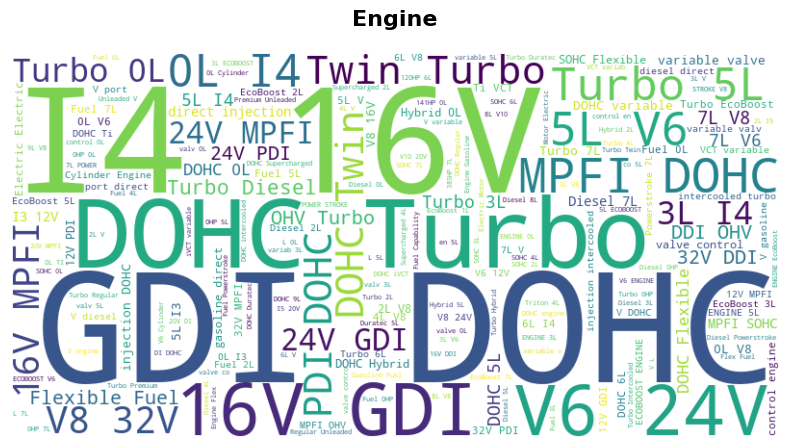

In [142]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_engine)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Engine", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

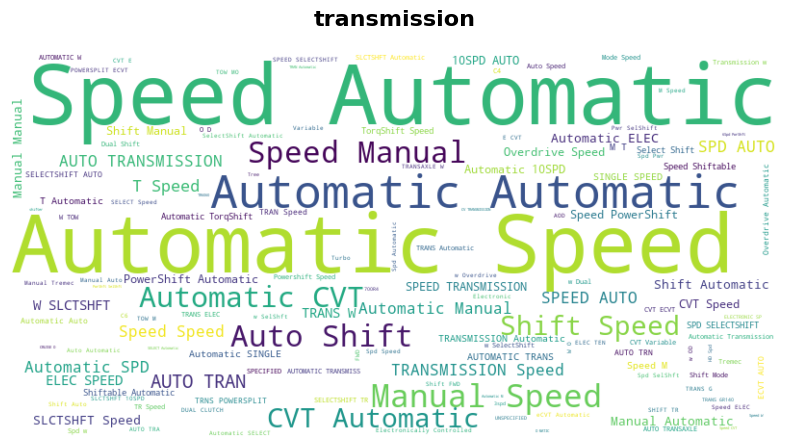

In [143]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_transmission)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("transmission", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

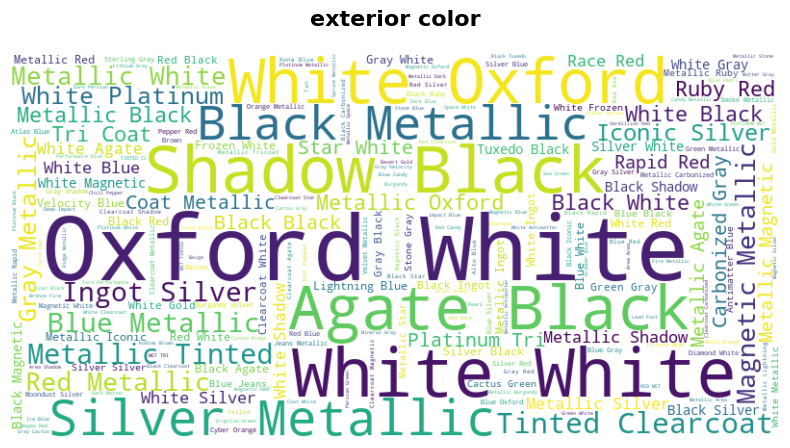

In [144]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_exterior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("exterior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

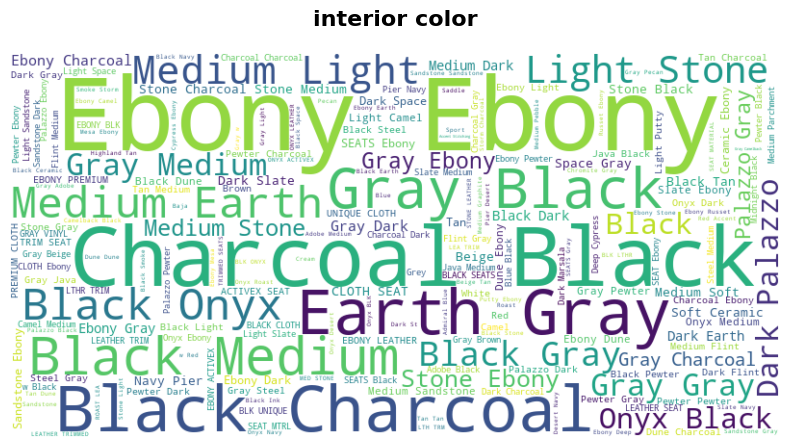

In [145]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_interior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("interior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

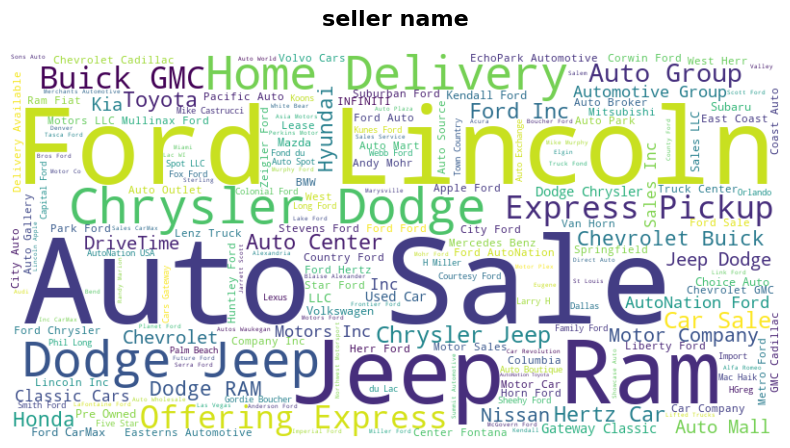

In [146]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_seller_name)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("seller name", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

# Data cleaning : Handling missing values and Preprocessing

### Process breakdown
* `mileage` : Fill method = `median` for `0.05%` missing values 
* `engine`: `mode` for 0.25% missing values 
* `transmission`: fill method = `mode` for `0.9%` missing values 	`
* `drivetrain` :	fill method = `mode` for `3%`	 missing values 
* `fuel_type` : fill method = `mode` for	`4.5%` missing values 	
* `mpg` : fill method = 	`27%`		Impute using median values grouped by `fuel_type`
* `exterior_color` : fill method = `mode` for	`1.8%` missing values 	
* `interior_color` : fill method = `mode` for	`11.5%` missing values 	
* `accidents_or_damage` : fill method = `most_occured` for `2.7%` missing values 	
* `one_owner` : fill method =	`most_occured` for 4% missing values 	
* `personal_use_only` : fill method = `most_occured` for `2.8%` missing values 	
* `seller_name` : fill method = `Drop the column` because of `no relation to the target feature`		
* `seller_rating` : fill method =	`median` for `30%` missing values	
* `driver_rating` : fill method = `median` for `5.8%` missing values	
* `price_drop` : fill method = `Drop the column` because of `a high amount of missing data`

In [147]:
# Let's first seprate the numerical and categorical featres into the respctive categories. Incase if we need to use in further cleaning process.

In [148]:
# ✅ Define Imputation Strategies for Individual Features
impute_methods = {
    "mileage":"median",
    "engine": "most_frequent",
    "transmission": "most_frequent",
    "drivetrain": "most_frequent",
    "fuel_type": "most_frequent",
    # "mpg": , will have to figure out something about this later
    "exterior_color": "most_frequent",
    "interior_color": "most_frequent",
    "accidents_or_damage": "most_frequent",
    "one_owner": "most_frequent",
    "personal_use_only": "most_frequent",
    # "seller_name": "", To be removed
    "seller_rating": "median",
    "driver_rating": "median",
    # "price_drop" To be removed
}

# ✅ Apply the appropriate imputation for each feature
for feature, strategy in impute_methods.items():
    imputer = SimpleImputer(strategy=strategy)
    df[[feature]] = imputer.fit_transform(df[[feature]])


In [149]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.00
1,model,0,0.00
2,year,0,0.00
3,mileage,0,0.00
4,engine,0,0.00
5,transmission,0,0.00
6,drivetrain,0,0.00
7,fuel_type,0,0.00
8,mpg,21568,27.12
9,exterior_color,0,0.00


### Now as per the above observation, we have to drop `price_drop` and `seller_name`, because the `former` is `having nearly 50% missing` data and `later` is `not relevant` for the goal.

In [153]:
# Dropping the features

df.drop(columns=["price_drop", "seller_name"], inplace=True)

### Now there are some modifications needs to be done on the `mpg` feature because the values are in `for eg. 12-18, 10-15, 19-22 format`, we have to fix this and get one average number out of it and then fill the missing values with appropriate mathod.

* Moreover, the `mpg` of any vehicle depends on the type of fuel the particular car is running on, so we need to groupby the fuel_type first to average the mpg for each particular record

In [150]:
# Extracting min and max values from "mpg" format "10-15"
df[['mpg_min', 'mpg_max']] = df["mpg"].str.extract(r'(\d+)-(\d+)')

# Converting to numeric & calculate the average
df["mpg"] = df[['mpg_min', 'mpg_max']].astype(float).mean(axis=1)

# Computing median MPG for each fuel_type
mpg_medians = df.groupby("fuel_type")["mpg"].median()

# Filling missing MPG values with the median of the respective `fuel_type`
df["mpg"] = df.apply(lambda row: mpg_medians[row["fuel_type"]] if pd.isna(row["mpg"]) else row["mpg"], axis=1)

# Filling the remaninig values with overall median of the mpg if there is any
df["mpg"].fillna(df["mpg"].median(), inplace=True)


# Dropping temporary columns
df.drop(columns=["mpg_min", "mpg_max"], inplace=True)

C:\Users\rajgo\AppData\Local\Temp\ipykernel_17792\3374362713.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mpg"].fillna(df["mpg"].median(), inplace=True)


#### Let's now check if there is missing values anymore in our dataset

In [154]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.0
1,model,0,0.0
2,year,0,0.0
3,mileage,0,0.0
4,engine,0,0.0
5,transmission,0,0.0
6,drivetrain,0,0.0
7,fuel_type,0,0.0
8,mpg,0,0.0
9,exterior_color,0,0.0
